# Intro

This notebook is for **prediction on 'decision_0' in dataset**, using **question 1 and 3 ( = attr1_1, attr3_1 ) **   
we will use some machine learning models.  
next we'll look over the features of the selected model.

# Data import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_data = pd.read_csv("../data/Speed Dating Data.csv")
df_data.shape

(8378, 195)

# Data prerprocessing

In [3]:
# select features
cols = ['iid', 'pid', 'match','gender','dec', 'age',
        'attr1_1', 'sinc1_1', 'fun1_1', 'intel1_1', 'amb1_1',
        'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1']

# drop missing values.
row_full = df_data.shape[0]
df_selected = df_data.loc[:, cols]
df_selected.dropna(inplace=True)
row_drop = df_selected.shape[0]

miss_rate = (row_full - row_drop) / row_full
print("missing rate :", miss_rate)

missing rate : 0.0185008355216042


In [4]:
# Separate dataframe into male and female.
df_male = df_selected.loc[ df_selected['gender'] == 1 ]
df_female = df_selected.loc[ df_selected['gender'] == 0 ]

# Then, Let's make dropped duplicates dataframe of male.
df_male_drop = df_male.drop_duplicates(subset=['iid'])
df_female_drop = df_female.drop_duplicates(subset=['iid'])

# Let's make dataframe for matching. (empty yet)
df_match = pd.DataFrame( data = None, columns = cols + 
                        ['dec_o', 'age_o', 
                         'attr1_1_o', 'sinc1_1_o', 'fun1_1_o', 'intel1_1_o',  'amb1_1_o', 
                         'attr3_1_o','sinc3_1_o','fun3_1_o', 'intel3_1_o','amb3_1_o'] )
index = 0

print("dataframe is been making...")
# Let's fill each rows of dataframe for matching.
for m_index, m_row in df_male.iterrows() :
    
    # Find pid row in female_drop dataframe.
    pid = m_row['pid']
    f_row = df_female_drop.loc[ df_female_drop['iid'] == pid ]
    
    if f_row.empty :
        continue
    
    f_row = f_row.iloc[0]
    
    # Extract values from each row of dataframe.
    values = list(m_row.values) + list(f_row['dec':'amb3_1'].values)
    
    # Fill a row of match dataframe
    df_match.loc[index] = values
    index += 1
    
    # Print current progress at each 100 row.
    if index % 100 == 0 :
        print(index, end = " ")

# Let's fill each rows of dataframe for matching.
for fm_index, fm_row in df_female.iterrows() :
    
    # Find pid row in male_drop dataframe.
    pid = fm_row['pid']
    m_row = df_male_drop.loc[ df_male_drop['iid'] == pid ]
    
    if m_row.empty :
        continue
    
    m_row = m_row.iloc[0]
    
    # Extract values from each row of dataframes.
    values = list(fm_row.values) + list(m_row['dec':'amb3_1'].values)
    
    
    # Fill a row of match dataframe
    df_match.loc[index] = values
    index += 1
    
    # Print current progress at each 100 row.
    if index % 100 == 0 :
        print(index, end = " ")

print() 
print("making success.\n")            
print("df_match shape : ", df_match.shape)
df_match.head()

dataframe is been making...
100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 
making success.

df_match shape :  (8078, 28)


,iid,pid,match,gender,dec,age,attr1_1,sinc1_1,fun1_1,intel1_1,...,attr1_1_o,sinc1_1_o,fun1_1_o,intel1_1_o,amb1_1_o,attr3_1_o,sinc3_1_o,fun3_1_o,intel3_1_o,amb3_1_o
0,11.0,1.0,0.0,1.0,0.0,27.0,35.0,20.0,20.0,20.0,...,15.0,20.0,15.0,20.0,15.0,6.0,8.0,8.0,8.0,7.0
1,11.0,2.0,0.0,1.0,0.0,27.0,35.0,20.0,20.0,20.0,...,45.0,5.0,20.0,25.0,0.0,7.0,5.0,10.0,8.0,3.0
2,11.0,3.0,0.0,1.0,0.0,27.0,35.0,20.0,20.0,20.0,...,35.0,10.0,10.0,35.0,10.0,8.0,9.0,8.0,9.0,8.0
3,11.0,4.0,0.0,1.0,0.0,27.0,35.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,10.0,7.0,8.0,9.0,7.0,8.0
4,11.0,5.0,0.0,1.0,0.0,27.0,35.0,20.0,20.0,20.0,...,20.0,5.0,25.0,25.0,10.0,6.0,3.0,6.0,10.0,8.0


# Select Features for model
we will use 12 features for input. and 1 feature for output(label)

In [5]:
X = ['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1',
   'attr1_1_o', 'sinc1_1_o', 'fun1_1_o', 'intel1_1_o',  'amb1_1_o',
   'age','age_o'
  ]
Y = ['dec_o']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

train, test = train_test_split(df_match, test_size = 0.25, random_state = 0)

train_X = train[X]
train_Y = train[Y]

test_X = test[X]
test_Y = test[Y]
 
features_one = train_X.values
target = train_Y.values

print("train shape : ", train_X.shape)
print("test shape : ", test_X.shape)

train shape :  (6058, 12)
test shape :  (2020, 12)


# Learning model (Random Forest)

We used some models such as SVM-linear, SVM-rbf, KNN and etc before. (refer to notebook 'Prediction on "decision_o".ipynb')  
Finally, we found that **Random Forest is most fitted model for us.**  
So, from now on, we deal with this model more deeply.

## 1. Performance

C:\Users\Jeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


The accuracy of the Random Forest is 0.9633663366336633
AUC in ROC curve is 0.9544881889763779


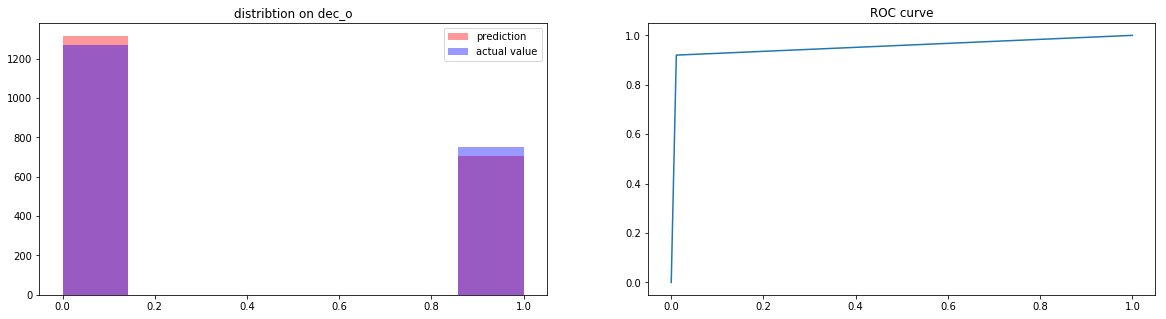

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(features_one, target)
dt_prediction = clf.predict(test_X)

accuracy = metrics.accuracy_score(dt_prediction, test_Y)
print('The accuracy of the Random Forest is', accuracy)

# print AUC
auc = metrics.roc_auc_score(test_Y, dt_prediction)
print("AUC in ROC curve is", auc)

fig, axs = plt.subplots(ncols = 2)
fig.set_size_inches(w = 20, h = 5)

# # draw distribution graph
axs[0].set_title("distribtion on dec_o")
sns.distplot(dt_prediction, kde = False, label="prediction", color='red', ax=axs[0])
sns.distplot(test_Y, kde = False, label="actual value", color='blue', ax=axs[0],)
axs[0].legend()

# draw ROC curve
fpr, tpr, threshold = metrics.roc_curve(test_Y, dt_prediction)
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.show()

## 2. Feature analysis

### Importance of features

Text(0.5,1,'importance of features')

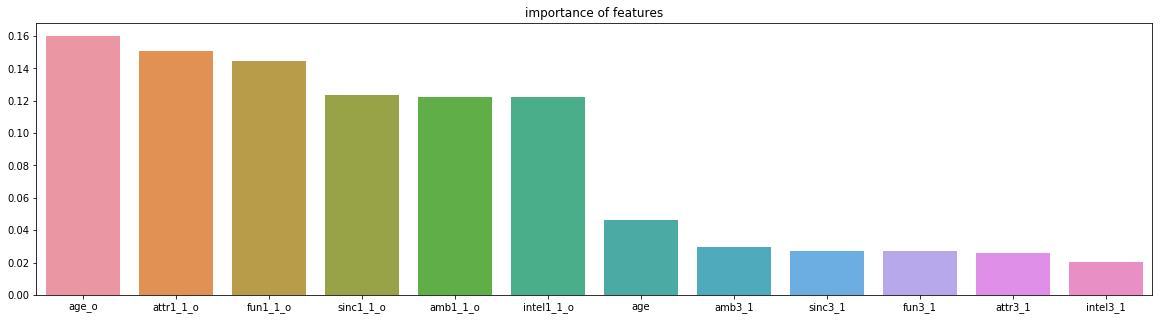

In [11]:
ft_importance = clf.feature_importances_
df_ft = pd.DataFrame(index = X, data = ft_importance, columns=['importance'])
df_ft.sort_values(by = ['importance'], inplace = True, ascending=False)
df_ft = df_ft.T

plt.figure(figsize=(20,5))

fig = sns.barplot(data = df_ft)
fig.set_title("importance of features")

### Correlation of features

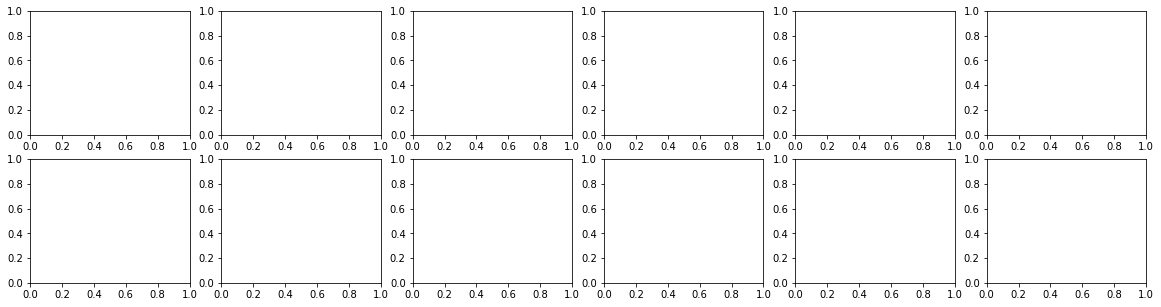

In [17]:
df_match['prediction_dec_o'] = clf.predict_proba(df_match[X])

fig, axs = plt.subplots(nrows = 2, ncols = 6)
fig.set_size_inches(w = 20, h = 5)

sns.regplot(x = df_match['age_o'], y = df_match)

# Test

Then, who is the person who will want to meet a participant again probabilistically?  
Let's consider only a person whose iid is 0, and think about 3 most probabilistacally high partners.

### Make a dataframe for a participant

this dataframe will contain a participant's answer for question 3, other participant's answer for question 1, and ages.  
this dataframe mean input features of above model to predict who will want to meet the participant again.

In [26]:
# Let's choose a participant who is iid is 0. She is a female participant.
participant = df_female.iloc[0]

# Extract only features we need.
cols = ['age', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1',  'amb3_1']
participant = participant.loc[cols]
participant_values = list( participant.values )

# Let's make dataframe for the participant. (empty yet)
df_input = pd.DataFrame( data = None, columns = cols + ['age_o', 'attr1_1_o', 'sinc1_1_o', 'fun1_1_o', 'intel1_1_o',  'amb1_1_o'] )
index = 0

print("dataframe is been making ...")

# Let's fill each rows of dataframe.
for m_index, m_row in df_male_drop.iterrows() :
    values = participant_values + list(m_row['age':'amb1_1'].values)
            
    df_input.loc[index] = values
    index += 1
    
    # Print current progress at each 100 row.
    if index % 100 == 0 :
        print(index, end = " ")
print()
print("success.\n")

# We need to fix above dataframe for order of X.
X = ['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1',
   'attr1_1_o', 'sinc1_1_o', 'fun1_1_o', 'intel1_1_o',  'amb1_1_o',
   'age','age_o'
  ]
df_input = df_input[X]

print(df_input.shape)
df_input.head()

dataframe is been making ...
100 200 
success.

(272, 12)


,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,attr1_1_o,sinc1_1_o,fun1_1_o,intel1_1_o,amb1_1_o,age,age_o
0,6.0,8.0,8.0,8.0,7.0,35.0,20.0,20.0,20.0,0.0,21.0,27.0
1,6.0,8.0,8.0,8.0,7.0,60.0,0.0,40.0,0.0,0.0,21.0,22.0
2,6.0,8.0,8.0,8.0,7.0,19.0,18.0,18.0,19.0,14.0,21.0,22.0
3,6.0,8.0,8.0,8.0,7.0,30.0,5.0,40.0,15.0,5.0,21.0,23.0
4,6.0,8.0,8.0,8.0,7.0,30.0,10.0,10.0,20.0,10.0,21.0,24.0


### Prediction

In [28]:
# Input dataframe into our model.
prediction = clf.predict_proba(df_input)

# Let's make result dataframe and add column including 'prediction'
dec_prediciton = []
for i in prediction :
    dec_prediciton.append(i[0])
cols = ['iid', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1']
df_result = df_male_drop.loc[:, cols]
df_result['dec_prediction'] = dec_prediciton

# Sort by prediction value.
df_result.sort_values(by = ['dec_prediction'], inplace = True, ascending= False )
df_result.head()

,iid,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec_prediction
100,11,8.0,9.0,7.0,8.0,5.0,1.0
3561,251,8.0,10.0,9.0,10.0,9.0,1.0
3516,246,7.0,8.0,6.0,7.0,6.0,1.0
6338,411,8.0,6.0,9.0,7.0,5.0,1.0
3368,232,8.0,8.0,8.0,8.0,6.0,1.0


above dataframe mean other participants who want to meet a participant (who we selected at first) again.  
It is sorted by desc-order.  
It predicted that participant whose iid are 11, 251, 246, 411, 232 want to meet her again.

### Distribution of dec_o

Text(0.5,1,'distribution of dec_o')

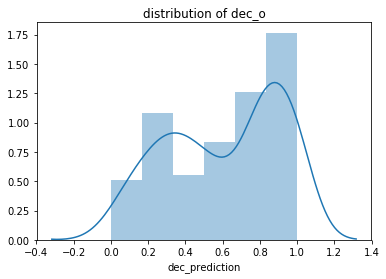

In [31]:
fig = sns.distplot(df_result['dec_prediction'], hist=True, kde=True)
fig.set_title("distribution of dec_o")